Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.441109..252.32477].


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 1000 / length of data axis 1                          
NAXIS2  =                 1000 / length of data axis 2                          
NAXIS3  =                    3 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2025-09-15T01:19:09' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CRVAL1  =    339.2672051061111 / right ascension of reference pixel (deg)       
CRVAL2  =    34.41638688388889 / declination of reference pixel (deg)           
CRPIX1  =                 50

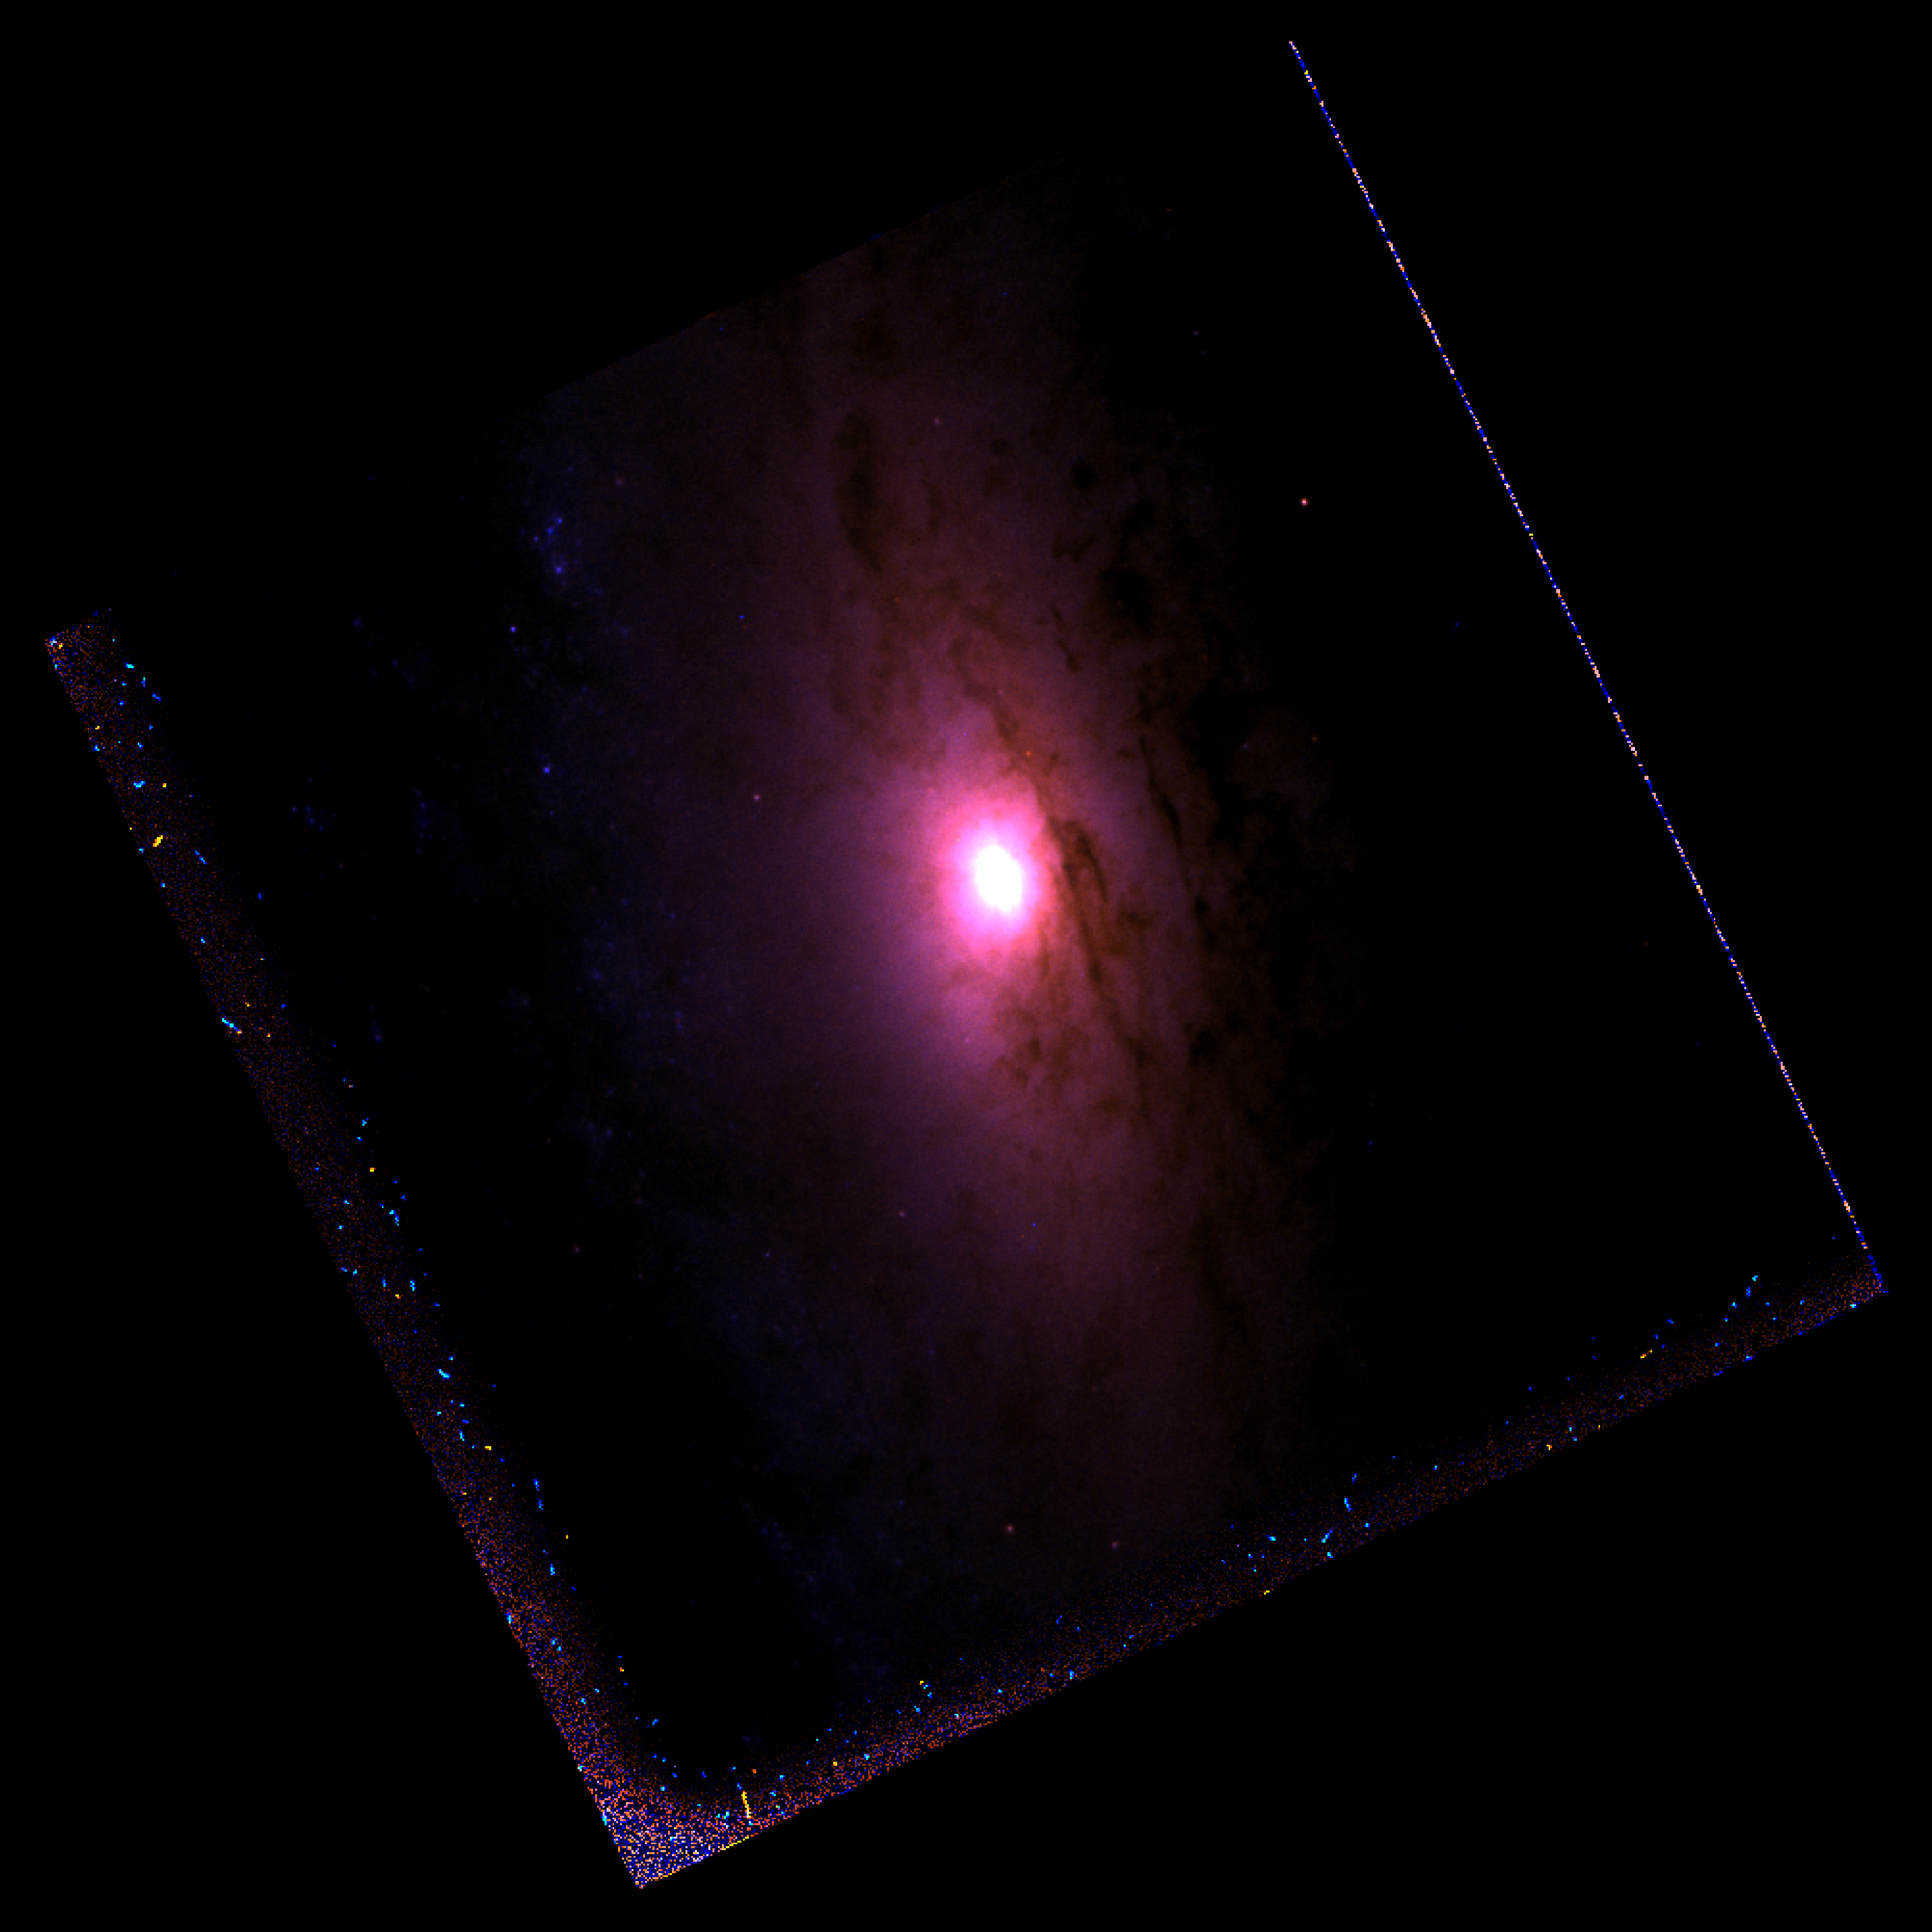

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
# https://hla.stsci.edu/cgi-bin/preview.cgi?dataset=hst_07450_18_wfpc2_f450w_pc
# https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_07450_18_wfpc2_f450w_pc_drz.fits
filepath  = "hst_07450_18_wfpc2_f814w_f450w_pc_sci.fits"
data = fits.open(filepath)
print(repr(data[0].header))
image_data = fits.getdata(filepath)

# (M,N,3) transpose for imshow (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
print(type(image_data))
print(image_data.shape)
image_data = np.transpose(image_data, (1,2,0))
print(image_data.shape)
# image_data = image_data[:,:,[2,1,0]]
GOODMIN = -4.035094
GOODMAX = 714.0341

def attemptColorize(image_data,falseR,falseG,falseB, Darkness):
    MIN = 0
    MAX = Darkness
    image_data[:,:,0] = (image_data[:,:,0] - MIN) / (MAX*falseR)# No quantum efficiency found
    image_data[:,:,1] = (image_data[:,:,1] - MIN) / (MAX*falseG)# No quantum efficiency found
    image_data[:,:,2] = (image_data[:,:,2] - MIN) / (MAX*falseB)# No quantum efficiency found
    return(image_data)
image_data = attemptColorize(image_data, 2, 3, 0.5, Darkness=3)

fig,ax = plt.subplots()
ax.imshow(image_data)
ax.axis('off')
fig.set_facecolor("black")
fig.set_figheight(50)
fig.set_figwidth(50)
plt.show()